# Merging Ordered and Time-Series Data

## Imports

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
worldbank_gdp = pd.read_csv('../data/WorldBank_GDP.csv')
sp500 = pd.read_csv('../data/S&P500.csv').rename(columns={'Date': 'date', 'Returns': 'returns'})
unemployment = pd.read_csv('../data/unemployment.csv')
inflation = pd.read_csv('../data/inflation.csv')
worldbank_pop = pd.read_csv('../data/WorldBank_POP.csv')
pop = pd.read_csv('../data/pop.csv')
gdp_2 = pd.read_csv('../data/gdp_2.csv')

In [5]:
gdp = worldbank_gdp[['Country Code', 'Year', 'GDP']][worldbank_gdp['Country Code'] == 'USA']\
    .rename(columns={'Country Code': 'country code', 'Year': 'year', 'GDP': 'gdp'}).copy()

In [25]:
worldbank_pop

,Country Name,Country Code,Indicator Name,Year,Pop
0,Aruba,ABW,"Population, total",2010,101669.0
1,Afghanistan,AFG,"Population, total",2010,29185507.0
2,Angola,AGO,"Population, total",2010,23356246.0
3,Albania,ALB,"Population, total",2010,2913021.0
4,Andorra,AND,"Population, total",2010,84449.0
...,...,...,...,...,...
2635,Kosovo,XKX,"Population, total",2018,1845300.0
2636,"Yemen, Rep.",YEM,"Population, total",2018,28498687.0
2637,South Africa,ZAF,"Population, total",2018,57779622.0
2638,Zambia,ZMB,"Population, total",2018,17351822.0


## Using merge_ordered()

### Correlation between GDP and S&P500

In [14]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left')

# Print gdp_sp500
print(gdp_sp500)

  country code  year           gdp    date  returns
0          USA  2010  1.499210e+13  2010.0    12.78
1          USA  2011  1.554260e+13  2011.0     0.00
2          USA  2012  1.619700e+13  2012.0    13.41
3          USA  2012  1.619700e+13  2012.0    13.41
4          USA  2013  1.678480e+13  2013.0    29.60
5          USA  2014  1.752170e+13  2014.0    11.39
6          USA  2015  1.821930e+13  2015.0    -0.73
7          USA  2016  1.870720e+13  2016.0     9.54
8          USA  2017  1.948540e+13  2017.0    19.42
9          USA  2018  2.049410e+13     NaN      NaN


In [15]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left',
                             fill_method='ffill')


# Print gdp_sp500
print (gdp_sp500)

  country code  year           gdp  date  returns
0          USA  2010  1.499210e+13  2010    12.78
1          USA  2011  1.554260e+13  2011     0.00
2          USA  2012  1.619700e+13  2012    13.41
3          USA  2012  1.619700e+13  2012    13.41
4          USA  2013  1.678480e+13  2013    29.60
5          USA  2014  1.752170e+13  2014    11.39
6          USA  2015  1.821930e+13  2015    -0.73
7          USA  2016  1.870720e+13  2016     9.54
8          USA  2017  1.948540e+13  2017    19.42
9          USA  2018  2.049410e+13  2017    19.42


In [16]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp', 'returns']]

# Print gdp_returns correlation
print(gdp_returns.corr())

              gdp   returns
gdp      1.000000  0.212173
returns  0.212173  1.000000


### Phillips curve using merge_ordered()

         date      cpi     seriesid  Unnamed: 4       data_type  \
0  2014-01-01  235.288  CUSR0000SA0  SEASONALLY  ADJUSTED INDEX   
1  2014-06-01  237.231  CUSR0000SA0  SEASONALLY  ADJUSTED INDEX   
2  2015-01-01  234.718  CUSR0000SA0  SEASONALLY  ADJUSTED INDEX   
3  2015-06-01  237.684  CUSR0000SA0  SEASONALLY  ADJUSTED INDEX   
4  2016-01-01  237.833  CUSR0000SA0  SEASONALLY  ADJUSTED INDEX   
5  2016-06-01  240.167  CUSR0000SA0  SEASONALLY  ADJUSTED INDEX   
6  2017-01-01  243.780  CUSR0000SA0  SEASONALLY  ADJUSTED INDEX   
7  2017-06-01  244.182  CUSR0000SA0  SEASONALLY  ADJUSTED INDEX   
8  2018-01-01  248.884  CUSR0000SA0  SEASONALLY  ADJUSTED INDEX   
9  2018-06-01  251.134  CUSR0000SA0  SEASONALLY  ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                6.1  
2                5.6  
3                5.3  
4                5.0  
5                4.9  
6                4.7  
7                4.3  
8                4.1  
9                4.0  


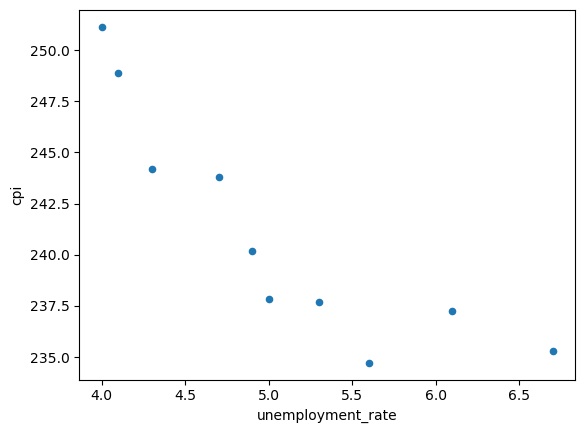

In [23]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='date', how='inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind='scatter', x='unemployment_rate', y='cpi')
plt.show()

### merge_ordered() caution, multiple columns

In [32]:
gdp = gdp_2.copy()

In [34]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=['date', 'country'], 
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)

          date    country         gdp  series_code_x       pop series_code_y
0   1990-01-01  Australia  158051.132  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1   1990-01-01     Sweden   79837.846  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
2   1990-04-01  Australia  158263.582  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
3   1990-04-01     Sweden   80582.286  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
4   1990-07-01  Australia  157329.279  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
5   1990-07-01     Sweden   79974.360  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
6   1990-09-01  Australia  158240.678  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
7   1990-09-01     Sweden   80106.497  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
8   1991-01-01  Australia  156195.954  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
9   1991-01-01     Sweden   79524.242  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
10  1991-04-01  Australia  155989.033  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
11  1991-04-01     Sweden   79073.059  NYGDPMKTPSAKD   8617375   SP.POP.TOTL

In [35]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=['country', 'date'], 
                             fill_method='ffill')

# Print date_ctry
print(date_ctry)

          date    country         gdp  series_code_x       pop series_code_y
0   1990-01-01  Australia  158051.132  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1   1990-04-01  Australia  158263.582  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
2   1990-07-01  Australia  157329.279  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
3   1990-09-01  Australia  158240.678  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
4   1991-01-01  Australia  156195.954  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
5   1991-04-01  Australia  155989.033  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
6   1991-07-01  Australia  156635.858  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
7   1991-09-01  Australia  156744.057  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
8   1992-01-01  Australia  157916.081  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
9   1992-04-01  Australia  159047.827  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
10  1992-07-01  Australia  160658.176  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
11  1992-09-01  Australia  163960.221  NYGDPMKTPSAKD  17495000   SP.POP.TOTL

## Using merge_asof()

### Using merge_asof() to study stocks

In [43]:
jpm = pd.read_csv('../data/jpm.csv')
wells = pd.read_csv('../data/wells.csv')
bac = pd.read_csv('../data/bac.csv')

jpm['date_time'] = pd.to_datetime(jpm['date_time'])
wells['date_time'] = pd.to_datetime(wells['date_time'])
bac['date_time'] = pd.to_datetime(bac['date_time'])


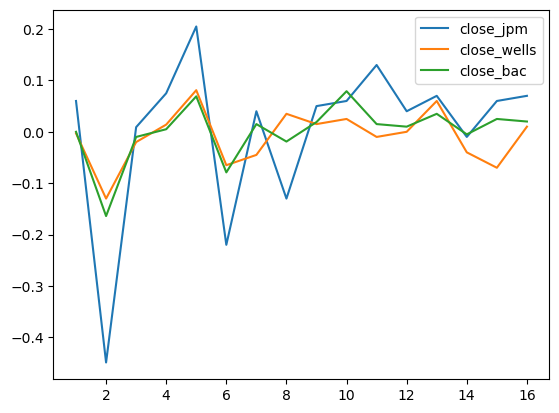

In [47]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', direction='nearest', 
                       suffixes=('', '_wells'))


# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', direction='nearest', 
                              suffixes=('_jpm', '_bac'))


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

### Using merge_asof() to create dataset

In [52]:
gdp = pd.read_csv('../data/gdp_3.csv')
recession = pd.read_csv('../data/recession.csv')

gdp['date'] = pd.to_datetime(gdp['date'])
recession['date'] = pd.to_datetime(recession['date'])

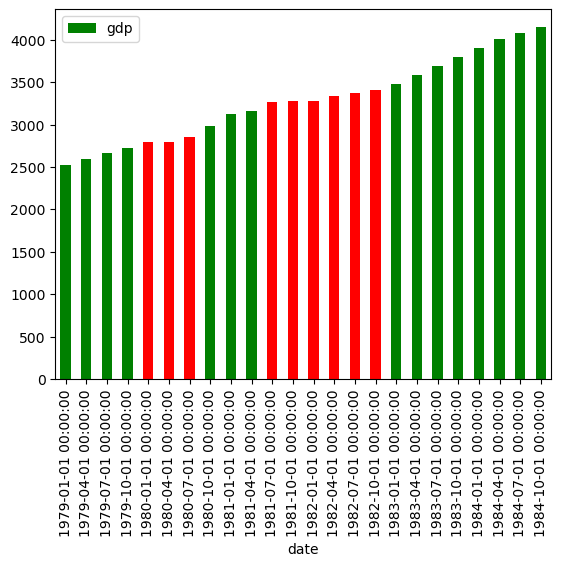

In [55]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

## Selecting data with .query()

### Subsetting rows with .query()

In [68]:
gdp = pd.read_csv('../data/gdp_2.csv', parse_dates=['date'])
pop = pd.read_csv('../data/pop.csv', parse_dates=['date'])

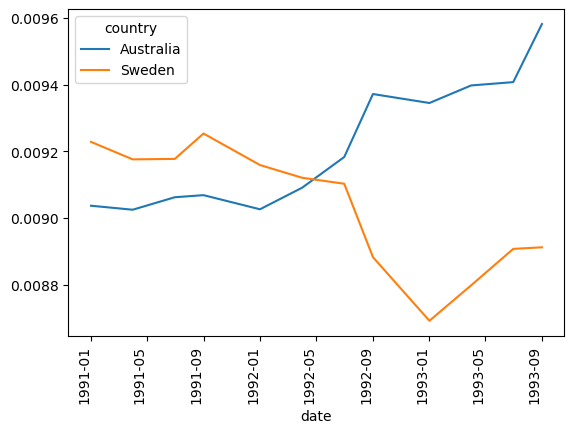

In [70]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country', 'date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', index='date', columns='country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

## Reshaping data with.melt()

### Using .melt() to reshape government data

In [86]:
ur_wide = pd.read_csv('../data/ur_wide.csv', dtype={'year': str})

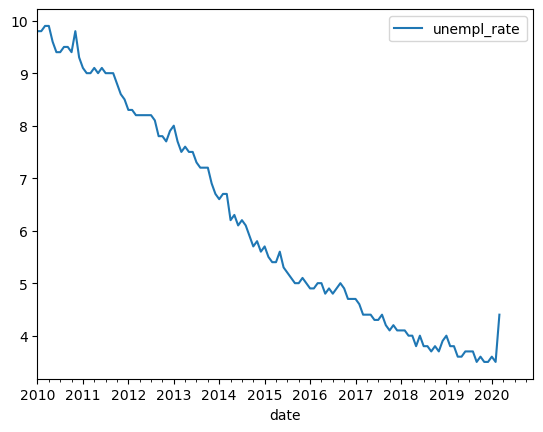

In [93]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['year'], var_name='month', value_name='unempl_rate')


# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'], format='%Y-%b')

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values(by='date', ascending=True)

# Plot the unempl_rate by date
ur_sorted.plot(y='unempl_rate', x='date')
plt.show()

### Using .melt() for stocks vs bond performance

In [110]:
ten_yr = pd.read_csv('../data/ten_yr.csv')
dji = pd.read_csv('../data/dji.csv')

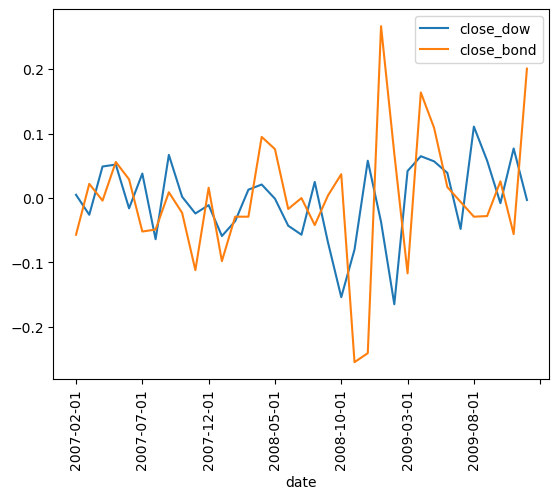

In [116]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars='metric', var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc[bond_perc['metric'] == 'close']

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=('_dow', '_bond'))

# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=90)
plt.show()